<a href="https://colab.research.google.com/github/mibarar/DataScience/blob/better/DataScience_Project_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind


In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Football Players' Price Prediction. Analysing Some of Their Features.

We will analyse Fifa dataset for two years 2016 and 2020. It is obtained from [Kaggle](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_15.csv).  There are several notebooks using this dataset in Kaggle. Good examples are: [Notebook 1](https:/www.kaggle.com/ekrembayar/fifa-data-analysis-visualization), [Notebook 2](https://www.kaggle.com/luizfernandogontijo/fifa20-football-analysis) and [Notebook 3](https://www.kaggle.com/muhammadayman/some-insights-for-fifa-19). The 2016 data will be used for preliminary analysis and training a linear regression model. Then, we will try to predict players' value in 2020. This will not be a time series analysis, but rather an attempt to tell price based on changed characteristics of the players like age, club, abilities which can improve or deteriorate (in case of injury for example). The structure of the work is as following:
1. Description of the dataset
2. Importing and cleaning the data
3. Perform EDA
4. Create hypothesis and linear regression model and 
5. Check hypothesis and test model with new data

### Description of the dataset

Most of the column names are self explanatory. I will mention only those which are not understandable for the general public. To start with - the group of:  'team_positions','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'. 

These are abbreviations of players' positions on the field. Best they can be understood is by looking at the following picture.


![playground](data/playing-positions.png)


### Import and Clean the data

In [5]:
players_16=pd.read_csv("/content/drive/My Drive/DS/data/players_16.csv",index_col="sofifa_id")

In [6]:
players_16.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,550000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",RW,10.0,NaN,2004-07-01,2018.0,RW,10.0,92.0,88.0,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,NaN,13-12,23+2,21+1,6,11,15,14,8,87+3,87+3,87+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,90+3,82+3,82+3,82+3,90+3,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,475000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LM,7.0,NaN,2009-07-01,2018.0,ST,7.0,92.0,93.0,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,90+3,91+3,91+3,91+3,90+3,88+3,88+3,88+3,88+3,80+3,80+3,80+3,88+3,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
9014,https://sofifa.com/player/9014/arjen-robben/16...,A. Robben,Arjen Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,250000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RW,11.0,92.0,86.0,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84+3,84+3,84+3,89+3,88+3,88+3,88+3,89+3,88+3,88+3,88+3,87+3,80+3,80+3,80+3,87+3,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3
167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,250000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,NaN,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,87.0,91.0,86.0,60.0,90.0,"GK Long Throw, 1-on-1 Rush",15-10,13-12,25,48+6,11-14,16-9,14-11,11-14,47+6,31,58,61,43,88,35,25-17,78,44,83,16-9,29,30,12-13,70+20,37,NaN,10-15,10-15,11-14,85-3,87+2,91,90,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez

In [7]:
players_16.shape

(14881, 103)

From the database we can see that some of the columns will not be necessary for the analysis. They are: "player_url","long_name" (we have "short_name"), "wage_eur". Usually, wage is directly related to value, so either we know both or try to guess them. Makes no sense to make prediction for one based on the knowledge of the other. For the same reason, "Release clause" should also be removed. It is determined together with the value. Anyway, in this dataset there is no info about it.

Let's now see some general information about the dataset.

In [8]:
players_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14881 entries, 158023 to 11728
Columns: 103 entries, player_url to rb
dtypes: float64(17), int64(10), object(76)
memory usage: 11.8+ MB


In [9]:
players_16.isnull().sum().sort_values(ascending=False)

mentality_composure           14881
release_clause_eur            14881
nation_jersey_number          13871
nation_position               13871
loaned_from                   13827
player_tags                   13625
gk_diving                     13263
gk_handling                   13263
gk_kicking                    13263
gk_reflexes                   13263
gk_speed                      13263
gk_positioning                13263
player_traits                  8119
rcb                            1618
ls                             1618
dribbling                      1618
shooting                       1618
pace                           1618
rs                             1618
passing                        1618
physic                         1618
st                             1618
rb                             1618
lw                             1618
rm                             1618
lam                            1618
cam                            1618
ram                         

There are some features which have Null values for quite a large amount of records. "mentality_composure", "nation_position", "nation_jersey_number", "loaned_from","player_tags" have 91.6-100% missing data, so they can be removed. "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning", "gk_diving", "gk_handling" also have many null values but that is because the features are related to goal-keepers which are naturally much less than the field players. So we will keep them for now.

In [10]:
#Remove unnecessary columns

players_16=players_16.drop(["player_url","long_name","wage_eur","release_clause_eur","mentality_composure", "nation_position", "nation_jersey_number", "loaned_from","player_tags"],axis=1)

In [11]:
players_16.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,RW,10.0,2004-07-01,2018.0,92.0,88.0,86.0,95.0,24.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",80-4,93-1,71,88-1,85,96,89,90,79+3,96,95-1,90,92-2,92-2,95,80,68-5,76-1,59-1,88,48,22,90-2,90,74,13-12,23+2,21+1,6,11,15,14,8,87+3,87+3,87+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,91+3,90+3,82+3,82+3,82+3,90+3,62+3,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3
20801,Cristiano Ronaldo,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,LM,7.0,2009-07-01,2018.0,92.0,93.0,80.0,91.0,33.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",82-1,95,86,81-1,87,93,88,77-2,72,91-1,91,93-1,90-3,92+2,62-1,94,94,87-2,79,93,62-1,29+5,93+2,81,85,22,31,23,7,11,15,14,11,91+3,91+3,91+3,90+3,91+3,91+3,91+3,90+3,88+3,88+3,88+3,88+3,80+3,80+3,80+3,88+3,64+3,60+3,60+3,60+3,64+3,60+3,52+3,52+3,52+3,60+3
9014,A. Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,SUB,10.0,2009-08-28,2017.0,92.0,86.0,82.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,51-1,85-1,86,93,86+1,83,74-2,90-2,92-1,92-1,91-2,91,91,86,61,76-2,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15,84+3,84+3,84+3,89+3,88+3,88+3,88+3,89+3,88+3,88+3,88+3,87+3,80+3,80+3,80+3,87+3,65+3,60+3,60+3,60+3,65+3,59+3,47+3,47+3,47+3,59+3
167495,M. Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,GK,1.0,2011-07-01,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,85.0,87.0,91.0,86.0,60.0,90.0,"GK Long Throw, 1-on-1 Rush",15-10,13-12,25,48+6,11-14,16-9,14-11,11-14,47+6,31,58,61,43,88,35,25-17,78,44,83,16-9,29,30,12-13,70+20,37,10-15,10-15,11-14,85-3,87+2,91,90,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176580,L. Suárez,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,90,69000000,ST,Right,5,4,4,High/Medium,Normal,Yes,ST,9.0,2014-07-11,2019.0,83.0,88.0,79.0,87.0,42.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Beat Offside Trap, Flair, Technical Dri...",77,90-1,77+2,82,87+2,88-2,86,84,64,91+2,88,78-1,86,91,60,88+4,69,86,76,85+3,78,41,91+3,84,85,30,45,38,27,25,31,33,37,87+3,87+3,87+3,87+3,88+3,88+3,88+3,87+3,86+3,86+3,86+3,85+3,79+3,79+3,79+3,85+3,67+3,65+3,65+3,65+3,67+3,64+3,58+3,58+3,58+3,64+3


In [12]:
players_16.shape

(14881, 94)

In [13]:
players_16.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,14881.0,2.493045e+01,4.603521e+00,16.0,21.00,24.0,28.00,45.0
height_cm,14881.0,1.811025e+02,6.701927e+00,155.0,176.00,181.0,186.00,204.0
weight_kg,14881.0,7.542820e+01,6.933863e+00,50.0,70.00,75.0,80.00,110.0
overall,14881.0,6.565043e+01,7.095894e+00,44.0,61.00,66.0,70.00,94.0
potential,14881.0,7.028869e+01,6.293664e+00,44.0,66.00,70.0,75.00,95.0
value_eur,14881.0,1.766313e+06,4.172073e+06,0.0,250000.00,575000.0,1400000.00,111000000.0
international_reputation,14881.0,1.119145e+00,3.972144e-01,1.0,1.00,1.0,1.00,5.0
weak_foot,14881.0,2.942477e+00,6.580131e-01,1.0,3.00,3.0,3.00,5.0
skill_moves,14881.0,2.290572e+00,7.293560e-01,1.0,2.00,2.0,3.00,5.0
team_jersey_number,14710.0,1.942536e+01,1.619540e+01,1.0,8.00,17.0,26.00,99.0


These are the statistics for the numerical features. One of them is considered a numeral value but in fact its meaning is categorical - team_jersey_number. This should be taken into account later, in the preparation for submitting the dataset to the ML algorithm. Besides, there are several attributes which are in fact numerical values but due to the way they are input in the table, they are considered non numerical. These are the following columns:    'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'.
       
The values are written in the format "Number1+number2" (i.e. "78+1", "84+3"). Sample is shown below.       

In [14]:
players_16[['attacking_crossing','attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']].sample(7)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
216186,42+1,71-2,68+1,60+1,59+1,63-1,43+1,37+1,49+1,61+1,66-2,65-1,65-4,65+1,71+3,66+1,69,60,64,57-2,51+1,29+1,68-1,59+1,63+1,26+1,23+1,21+1,6+1,9+1,9+1,13+1,14+1,66+0,66+0,66+0,62+0,64+0,64+0,64+0,62+0,62+0,62+0,62+0,61+0,56+0,56+0,56+0,61+0,46+0,45+0,45+0,45+0,46+0,44+0,42+0,42+0,42+0,44+0
203535,73+1,50-22,60-7,76+1,68+1,73+1,74+1,68-1,66+1,81+1,70-5,66-7,75,75+1,77,75+1,74,75,71,71+1,76+1,65-3,65-7,77,68+1,58+1,67+1,55+1,12+1,8+1,16+1,12+1,12+1,67+0,67+0,67+0,71+0,71+0,71+0,71+0,71+0,72+0,72+0,72+0,72+0,73+0,73+0,73+0,72+0,69+0,70+0,70+0,70+0,69+0,68+0,66+0,66+0,66+0,68+0
224060,31+1,22+1,59+1,43+1,35+1,37+1,29+1,30+1,32+1,41+1,62,55,60,43+1,57,46+1,86+1,53,60,23+1,56+1,40+1,27+1,28+1,38+1,57+3,60+3,59+3,15+1,15+1,10+1,7+1,9+1,40+0,40+0,40+0,38+0,37+0,37+0,37+0,38+0,37+0,37+0,37+0,39+0,38+0,38+0,38+0,39+0,47+0,47+0,47+0,47+0,47+0,50+0,55+0,55+0,55+0,50+0
188490,50+1,47+1,48+1,68+1,62+1,60+1,52+1,58+1,66+1,64+1,74,77,75,55+1,74,68+1,61,82,70,60+1,63+1,52+1,57+1,65+1,51+1,54+1,53+1,54+1,12+1,8+1,16+1,14+1,13+1,59+0,59+0,59+0,61+0,61+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,63+0,63+0,63+0,63+0,61+0,61+0,61+0,61+0,61+0,60+0,57+0,57+0,57+0,60+0
192009,15-10,11-14,11-14,49+1,11-14,10-15,12-13,11-14,35+1,21+1,61+2,57-8,60,65+1,56+14,24-6,66+7,32-9,70+6,10-15,31+1,15-10,10-15,40+20,21+1,13-12,11-14,12-13,70+1,67+1,64+1,65+1,73+1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214553,58,69,69,62,76,64,50,30,53,72,67,70,71,64,68,71,72,69,79,59,40,39,74,52,69,24,37,34,13,9,13,13,7,69+0,69+0,69+0,66+0,67+0,67+0,67+0,66+0,64+0,64+0,64+0,65+0,60+0,60+0,60+0,65+0,53+0,51+0,51+0,51+0,53+0,52+0,48+0,48+0,48+0,52+0
216284,31+1,28+1,76+1,40+1,29+1,37+1,37+1,30+1,34+1,40+1,30,32,34,54+1,32,49+1,33,34,94+3,24+1,64+1,51+1,28+1,36+1,41+1,59+3,62+3,63+3,13+1,15+1,7+1,10+1,8+1,43+0,43+0,43+0,35+0,37+0,37+0,37+0,35+0,36+0,36+0,36+0,36+0,39+0,39+0,39+0,36+0,45+0,50+0,50+0,50+0,45+0,49+0,61+0,61+0,61+0,49+0


The numbers added after the "+/-" sign come from international reputation of player. So, for analysis purposes they can be added/subtracted. 


Before that, we have to handle the NaN values in several features. The ones that depict some abilitites of the players. Main reason for not having value is that either they are qualities of field players in the records for a goal keeper or vice versa. So, it is normal to replace them by zeroes. 

One more thing is noticed while checking the data. There is a kind of duplication of data. For example, columns "gk_diving","gk_handling", "gk_kicking","gk_reflexes" and "gk_positioning" look quite similar to 'goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_reflexes','goalkeeping_positioning'. The difference is that in the first group for the field players any rating about goalkeeping capabilities is missing, while in the second group there are some. We would better keep the second group because sometimes GK qualities are useful for field players. 

In [15]:
players_16=players_16.drop(["gk_diving","gk_handling", "gk_kicking","gk_reflexes","gk_positioning"],axis=1)

Thus, the columns which need filling with zeroes for NaN values and then transforming this type of string "Number1+number2" into a mathematical calculation are the following ones, put in the list "cols_for_fill".

In [16]:
cols_for_fill=['pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

The columns that need transformation are too many and it will be time consuming to do that manually. That's why we will create a function. It converts the values to string, substitutes "NaN" with "0" and then makes the string a mathematical expression (by using eval()).

In [17]:
def transform_columns_to_number(data_frame,columns_to_be_transformed):
    for col in columns_to_be_transformed:
        data_frame[col]=data_frame[col].astype(str)
        data_frame[col]=data_frame[col].replace("nan","0")
        data_frame[col]=pd.Series([eval(item) for item in data_frame[col].values]).values
    #return data_frame[col]    

In [18]:
transform_columns_to_number(players_16,cols_for_fill)

In [19]:
players_16.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,RW,10.0,2004-07-01,2018.0,92.0,88.0,86.0,95.0,24.0,62.0,0.0,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",76,92,71,87,85,96,89,90,82,96,94,90,90,90,95,80,63,75,58,88,48,22,88,90,74,1,25,22,6,11,15,14,8,90,90,90,94,94,94,94,94,94,94,94,93,85,85,85,93,65,60,60,60,65,60,47,47,47,60
20801,Cristiano Ronaldo,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,LM,7.0,2009-07-01,2018.0,92.0,93.0,80.0,91.0,33.0,78.0,0.0,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",81,95,86,80,87,93,88,75,72,90,91,92,87,94,61,94,94,85,79,93,61,34,95,81,85,22,31,23,7,11,15,14,11,94,94,94,93,94,94,94,93,91,91,91,91,83,83,83,91,67,63,63,63,67,63,55,55,55,63
9014,A. Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,SUB,10.0,2009-08-28,2017.0,92.0,86.0,82.0,92.0,32.0,64.0,0.0,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,84,86,93,87,83,72,88,91,91,89,91,91,86,61,74,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15,87,87,87,92,91,91,91,92,91,91,91,90,83,83,83,90,68,63,63,63,68,62,50,50,50,62
167495,M. Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,GK,1.0,2011-07-01,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,"GK Long Throw, 1-on-1 Rush",5,1,25,54,-3,7,3,-3,53,31,58,61,43,88,35,8,78,44,83,7,29,30,-1,90,37,-5,-5,-3,82,89,91,90,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176580,L. Suárez,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,90,69000000,ST,Right,5,4,4,High/Medium,Normal,Yes,ST,9.0,2014-07-11,2019.0,83.0,88.0,79.0,87.0,42.0,79.0,0.0,"Diver, Beat Offside Trap, Flair, Technical Dri...",77,89,79,82,89,86,86,84,64,93,88,77,86,91,60,92,69,86,76,88,78,41,94,84,85,30,45,38,27,25,31,33,37,90,90,90,90,91,91,91,90,89,89,89,88,82,82,82,88,70,68,68,68,70,67,61,61,61,67


Need to check for missing data.

In [20]:
players_16.isnull().sum().sort_values(ascending=False)

player_traits                 8119
joined                        1225
contract_valid_until           171
team_jersey_number             171
team_position                  171
attacking_finishing              0
dribbling                        0
defending                        0
physic                           0
gk_speed                         0
attacking_crossing               0
attacking_heading_accuracy       0
shooting                         0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
passing                          0
rb                               0
pace                             0
movement_reactions               0
age                              0
dob                              0
height_cm           

"player_traits" for now we will leave as it is. Anyway, it will not be submitted to the ML algorithm. 
"joined","team_position" and "contract_valid_until" seems logical to substitute with the most common value. While "team_jersey_number" we would replace with "0". We again need a function which will do the work for us.

In [21]:
def fill_missing_data(dataframe,columns):
    for col in columns:
        dataframe[col]=dataframe[col].fillna(dataframe[col].mode()[0])

In [22]:
columns=["joined","team_position","contract_valid_until"]
fill_missing_data(players_16,columns)

In [23]:
players_16["team_jersey_number"]=players_16["team_jersey_number"].fillna(0)

In [24]:
players_16.isnull().sum().sort_values(ascending=False)

player_traits                 8119
rb                               0
movement_reactions               0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
gk_speed                         0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
pace                             0
contract_valid_until             0
joined                           0
value_eur                        0
age                              0
dob                              0
height_cm                        0
weight_kg           

Now all columns are filled with values, except for "player_traites".

### Let's do some EDA

The aim is to see some interesting statistics about players and teams related to nationality, clubs, prices, age, etc.

First we will group the players by nationality and see which are the top 50 nationalities with largest number of players.

There will be many plottings, so in order to make our lives easy, we'd better make a function with appropriate parameters.

In [25]:
def draw_graphs(dataset,title,analyzed_feature,groupby_feature=None, stat_function=None,asc=None,orient=None,
               xtitle=None,ytitle=None,num_recs=None,marker_color="blue"):
    """
    Parameters and values they can take:
    stat_function="max","sum,"mean","count"
    orient="v","h"
       
    
    """
    if stat_function=="count":
        graph_data=dataset.groupby(groupby_feature)[analyzed_feature].count().sort_values(ascending=asc)[0:num_recs]
    elif stat_function=="max":
        graph_data=dataset.groupby(groupby_feature)[analyzed_feature].max().sort_values(ascending=asc)[0:num_recs]
    elif stat_function=="sum":
        graph_data=dataset.groupby(groupby_feature)[analyzed_feature].sum().sort_values(ascending=asc)[0:num_recs]
    else:
        graph_data=dataset.groupby(groupby_feature)[analyzed_feature].mean().sort_values(ascending=asc)[0:num_recs]
    if orient=='v':
        fig=px.bar(graph_data,x=graph_data.index,y=graph_data,orientation=orient,width=900, height=500)
    else:
        fig=px.bar(graph_data,x=graph_data,y=graph_data.index,orientation=orient,width=900, height=500)
    fig.update_layout(
    title_text=title,
    xaxis_title_text=xtitle,
    yaxis_title_text=ytitle) 
    fig.update_traces(marker_color=marker_color) 
    fig.show()
    

In [26]:
draw_graphs(dataset=players_16,title="Number of players per Nation (top 50)",
            analyzed_feature="nationality",groupby_feature="nationality",
            asc=False,xtitle="Nation",ytitle="Total number of players",
            stat_function="count",
            orient='v',num_recs=50,marker_color="violet")

Let's explore the age of players. We will take the top 20 most represented countries. We will calculate the average age per country and see some distributions.

In [27]:
top_20_nations=players_16.groupby("nationality")["nationality"].count().sort_values(ascending=False)[:20]

# Selecting all players which nationalities are in the top 20 most represented countries.

players_top_20_nations=players_16[players_16["nationality"].isin(top_20_nations.index)]

In [28]:
draw_graphs(dataset=players_top_20_nations,title="Average age of player per nationality",
            analyzed_feature="age",groupby_feature="nationality",
            asc=True,xtitle="Age",ytitle="Nationality",
            stat_function="mean",
            orient='h',num_recs=20)

The difference between lowest and highest age is about 2.5 years. Which is kind of expected. It is worth mentioning that youngest players come from England and the Netherlands which might be a sign of productive schools for young footballers. 

In [29]:
nationality_and_age=players_top_20_nations[["nationality","age"]]
fig = px.box(nationality_and_age, x="nationality", y="age")

fig.show()

It is interesting to see who the outliers are.

In [30]:
nations_list=["England","Sweden", "Colombia","Mexico","Norway"]
outliers=pd.DataFrame()
for nation in nations_list:
    player_nationality=nation
    nationality_max_age=players_top_20_nations[players_top_20_nations["nationality"]==nation]["age"].max()
    outliers=outliers.append(players_top_20_nations[(players_top_20_nations["nationality"]==nation) & (players_top_20_nations["age"]==nationality_max_age)])# & players_top_20_nations["age"]==nationality_max_age])
outliers

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11728,B. Richardson,45,1969-08-05,185,77,England,Wycombe Wanderers,44,44,10000,GK,Right,1,2,1,Medium/Medium,Stocky,No,SUB,13.0,2014-01-30,2021.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,-3,-3,-1,-1,-1,-3,-1,-3,1,23,25,25,38,34,44,1,51,32,47,7,45,7,1,9,5,3,-1,1,37,55,37,59,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
645,D. Andersson,42,1972-12-18,187,85,Sweden,Helsingborgs IF,57,57,20000,GK,Right,1,3,1,Medium/Medium,Normal,No,SUB,39.0,2011-01-01,2020.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,-1,1,-1,37,-5,1,1,9,32,25,-1,-1,-3,61,25,25,11,1,64,3,34,22,-1,31,-1,-1,11,13,59,52,50,59,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165854,J. Henao,43,1971-12-30,181,79,Colombia,Once Caldas,65,65,90000,GK,Right,1,3,1,Medium/Medium,Stocky,No,SUB,1.0,2010-07-01,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,Team Player,3,-5,5,34,5,13,3,24,48,25,52,53,59,60,57,1,72,34,60,3,32,22,1,27,11,3,1,-1,72,70,58,67,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140029,O. Pérez,42,1973-02-01,172,75,Mexico,Pachuca,70,70,230000,GK,Right,2,3,1,Medium/Medium,Stocky,No,GK,21.0,2015-07-01,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,"GK Up for Corners, GK Long Throw",13,3,15,27,1,-1,-1,15,28,20,71,66,69,73,69,18,85,0,66,11,10,-1,-1,55,24,-3,-1,-3,71,65,66,73,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31834,F. Johnsen,41,1974-03-17,187,79,Norway,Odds BK,66,66,0,ST,Right,1,4,3,Medium/Medium,Lean,No,SUB,11.0,2010-01-01,2015.0,39.0,70.0,52.0,56.0,41.0,62.0,0.0,Power Header,54,72,84,53,73,51,62,52,44,61,15,22,62,53,57,75,70,48,74,66,49,33,77,55,61,33,44,43,15,13,10,9,15,66,66,66,56,60,60,60,56,57,57,57,54,53,53,53,54,45,46,46,46,45,45,50,50,50,45


Nothing interesting here since these are players in maybe some very low division clubs.

Which leads us to the idea of having these statistics made per nationality of the club players are in. Let's take the 5 best football leagues in Europe, those of: England, Spain, Italy, Germany and France. In this dataset we don't have information which league each club belongs to. So we have to get this data from another source.

The clubs dataset is created manually by copy/pasting lists with teams which participated in the number one league of each country (above mentioned five) during the 2015/16 season. These lists are taken from Wikipedia. 

In [31]:
clubs_data=pd.read_csv("/content/drive/My Drive/DS/data/Main_leagues_2016.csv",encoding="utf-8",sep="\\t")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [32]:
clubs_data

,Club,Club_country,League
0,Bournemouth,England,Premier League
1,Arsenal,England,Premier League
2,Aston Villa,England,Premier League
3,Chelsea,England,Premier League
4,Crystal Palace,England,Premier League
5,Everton,England,Premier League
6,Leicester City,England,Premier League
7,Liverpool,England,Premier League
8,Manchester City,England,Premier League
9,Manchester United,England,Premier League


In [33]:
#Count the number of teams in each league

clubs_data.groupby("League")["League"].count()

League
Bundesliga        18
La Liga           20
Ligue 1           20
Premier League    20
Serie A           20
Name: League, dtype: int64

Data seems ok. But we have to check if the names of clubs coinside in both tables (most probably, not exactly). In list "missing" we will put those club names from clubs_data which are not found in players_16.

In [34]:
missing=[club for club in clubs_data["Club"].unique() if club not in (players_16["club"].unique())]

In [35]:
missing

['Málaga']

This is quite strange that "Malaga" is missing in the data base. The manual search also didn't give any result. We have to live with that. One thing which was nothiced is that one and the same club has two ways of naming: "Athletic Club de Bilbao" and "Bilbao Athletic". In general, this club is known as "Athletico Bilbao", so I will rename all occurrences.

In [36]:
players_16["club"]=players_16["club"].str.replace("Athletic Club de Bilbao","Athletico Bilbao")
players_16["club"]=players_16["club"].str.replace("Bilbao Athletic" ,"Athletico Bilbao")

Here we will check if the substitution went correctly. All clubs containing "Bilbao" should be only "Athletic Bilbao".

In [37]:
players_16[(players_16["club"].str.find("Bilbao"))!=-1]["club"].unique()

array(['Athletico Bilbao'], dtype=object)

Finally, we can merge the datasets and sametime make s sub dataset with players only from the major European leagues and see statistics for them.

In [38]:
euro_league_players=players_16.merge(clubs_data, left_on='club', right_on='Club')

In [39]:
euro_league_players.shape

(2714, 92)

In [40]:
euro_league_players.head()

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Club,Club_country,League
0,L. Messi,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,RW,10.0,2004-07-01,2018.0,92.0,88.0,86.0,95.0,24.0,62.0,0.0,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",76,92,71,87,85,96,89,90,82,96,94,90,90,90,95,80,63,75,58,88,48,22,88,90,74,1,25,22,6,11,15,14,8,90,90,90,94,94,94,94,94,94,94,94,93,85,85,85,93,65,60,60,60,65,60,47,47,47,60,FC Barcelona,Spain,La Liga
1,L. Suárez,28,1987-01-24,182,85,Uruguay,FC Barcelona,90,90,69000000,ST,Right,5,4,4,High/Medium,Normal,Yes,ST,9.0,2014-07-11,2019.0,83.0,88.0,79.0,87.0,42.0,79.0,0.0,"Diver, Beat Offside Trap, Flair, Technical Dri...",77,89,79,82,89,86,86,84,64,93,88,77,86,91,60,92,69,86,76,88,78,41,94,84,85,30,45,38,27,25,31,33,37,90,90,90,90,91,91,91,90,89,89,89,88,82,82,82,88,70,68,68,68,70,67,61,61,61,67,FC Barcelona,Spain,La Liga
2,Neymar,23,1992-02-05,174,68,Brazil,FC Barcelona,88,93,71500000,LW,Right,5,5,5,High/Medium,Neymar,Yes,LW,11.0,2013-07-01,2018.0,90.0,80.0,72.0,92.0,30.0,57.0,0.0,"Diver, Flair, Technical Dribbler (CPU AI Only)",71,85,62,72,83,94,78,78,72,92,91,91,92,86,84,77,61,74,45,70,56,36,87,72,81,21,24,33,9,9,15,15,11,84,84,84,88,87,87,87,88,86,86,86,86,78,78,78,86,65,59,59,59,65,61,48,48,48,61,FC Barcelona,Spain,La Liga
3,Sergio Busquets,26,1988-07-16,189,76,Spain,FC Barcelona,86,88,39000000,CDM,Right,4,3,3,Medium/Medium,Lean,Yes,CDM,5.0,2008-09-01,2019.0,53.0,59.0,78.0,75.0,83.0,81.0,0.0,Diver,62,60,70,87,44,74,66,68,80,83,53,48,57,82,55,61,66,86,77,54,86,86,77,85,60,88,88,81,5,8,13,9,13,71,71,71,73,75,75,75,73,78,78,78,76,83,83,83,76,80,86,86,86,80,80,83,83,83,80,FC Barcelona,Spain,La Liga
4,Piqué,28,1987-02-02,193,85,Spain,FC Barcelona,85,86,29500000,CB,Right,4,3,2,High/Medium,Normal,Yes,RCB,3.0,2008-07-01,2019.0,64.0,61.0,70.0,64.0,86.0,76.0,0.0,Long Passer (CPU AI Only),64,70,82,82,57,68,73,43,76,76,56,67,57,81,44,71,74,69,83,60,68,88,66,62,69,86,87,83,10,11,14,15,8,70,70,70,68,69,69,69,68,70,70,70,70,76,76,76,70,78,83,83,83,78,80,85,85,85,80,FC Barcelona,Spain,La Liga


In [41]:
draw_graphs(dataset=euro_league_players,title="Average age per league",
            analyzed_feature="age",groupby_feature="League",
            asc=False,xtitle="League",ytitle="Age",
            stat_function="mean",
            orient='v',marker_color="lightblue")

It is interesting to see that England was the country with youngest players (average age is: 23.78) but the average age in Premier League is quite high 25.21. 

Below we will show boxplots of ages per league.

In [42]:
league_and_age=euro_league_players[["League","age"]]
fig = px.box(league_and_age, x="League", y="age",color="League",title="Age per League")

fig.show()

Let's check again the outliers because it is interesting to see who is playeing at the age of 42 and 40 in such serious tournaments. We will show the oldest footballer in each league.

In [43]:
#leagues_list=["England","Sweden", "Colombia","Mexico","Norway"]
euro_outliers=pd.DataFrame()
for league in euro_league_players["League"].unique():
    player_league=league
    league_max_age=euro_league_players[euro_league_players["League"]==league]["age"].max()
    euro_outliers=euro_outliers.append(euro_league_players[(euro_league_players["League"]==league) & (euro_league_players["age"]==league_max_age)])# & players_top_20_nations["age"]==nationality_max_age])
euro_outliers

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Club,Club_country,League
2418,Valerón,40,1975-06-17,186,76,Spain,UD Las Palmas,74,74,0,"CAM, CM",Right,2,4,4,Medium/Low,Lean,Yes,SUB,21.0,2013-07-15,2016.0,34.0,59.0,80.0,76.0,23.0,36.0,0.0,"Injury Free, Playmaker (CPU AI Only), Swerve P...",73,61,64,89,60,80,73,68,74,85,30,32,49,82,65,50,27,19,43,64,35,28,65,89,67,3,15,3,8,9,15,10,9,63,63,63,69,70,70,70,69,74,74,74,69,70,70,70,69,47,50,50,50,47,42,36,36,36,42,UD Las Palmas,Spain,La Liga
1774,A. Manninger,38,1977-06-04,189,85,Austria,FC Augsburg,72,72,350000,GK,Right,2,2,1,Medium/Medium,Normal,Yes,SUB,1.0,2012-11-21,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,"Puncher, Team Player",-1,-1,1,23,3,1,5,5,9,0,39,40,48,77,45,23,70,31,74,-3,40,7,-7,3,9,-3,3,5,73,73,65,73,75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FC Augsburg,Germany,Bundesliga
1394,M. Schwarzer,42,1972-10-06,194,95,Australia,Leicester City,73,73,500000,GK,Right,2,3,1,Medium/Medium,Normal,No,SUB,32.0,2015-01-06,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,NaN,1,-3,3,25,9,1,3,-3,24,9,50,46,36,76,43,30,57,-7,70,11,41,23,13,42,28,9,13,15,69,73,68,79,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Leicester City,England,Premier League
2603,B. Nivet,38,1977-01-02,178,75,France,ESTAC Troyes,73,73,300000,"CAM, CM",Right,2,3,3,Medium/Medium,Normal,No,SUB,10.0,2012-06-12,2016.0,59.0,70.0,74.0,72.0,55.0,61.0,0.0,"Playmaker (CPU AI Only), Team Player",63,73,59,79,65,75,74,74,74,80,54,60,64,71,72,72,24,59,70,68,59,55,70,82,77,54,60,46,12,8,9,15,8,69,69,69,70,71,71,71,70,73,73,73,70,72,72,72,70,61,65,65,65,61,60,58,58,58,60,ESTAC Troyes,France,Ligue 1
857,L. Castellazzi,39,1975-07-19,192,89,Italy,Torino,72,72,350000,GK,Left,2,2,1,Medium/Medium,Lean,No,RES,13.0,2014-09-01,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,Puncher,-1,-3,-3,32,-3,7,13,1,28,23,9,13,53,66,55,5,59,31,76,5,30,23,3,45,6,1,-1,7,76,76,66,84,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Torino,Italy,Serie A


#### $$$

And now let's finally see the money part. First we will check the major leagues, after that will make the analysis on the whole dataset.

In [44]:
euro_leagues_value=euro_league_players.groupby("League")["value_eur"].sum().sort_values()

In [45]:
draw_graphs(dataset=euro_league_players,title="Total value per league",
            analyzed_feature="value_eur",groupby_feature="League",
            asc=True,xtitle="Total Value",ytitle="League",
            stat_function="sum",
            orient='h',marker_color="lightgreen")

In [46]:
draw_graphs(dataset=euro_league_players,title="Average player value per league",
            analyzed_feature="value_eur",groupby_feature="League",
            asc=True,xtitle="Average Value",ytitle="Age",
            stat_function="mean",
            orient='h',marker_color="violet")

In [47]:
draw_graphs(dataset=euro_league_players,title="Total value per club",
            analyzed_feature="value_eur",groupby_feature="club",
            asc=False,xtitle="Club",ytitle="Total Value",
            stat_function="sum",
            orient='v',num_recs=20,marker_color="lightyellow")

In [48]:
draw_graphs(dataset=euro_league_players,title="Average value per club",
            analyzed_feature="value_eur",groupby_feature="club",
            asc=False,xtitle="Club",ytitle="Average Value",
            stat_function="mean",
            orient='v',num_recs=20,marker_color="orange")

In [49]:
draw_graphs(dataset=euro_league_players,title="Maximum player value per club",
            analyzed_feature="value_eur",groupby_feature="club",
            asc=False,xtitle="Club",ytitle="Maximum Value",
            stat_function="max",
            orient='v',num_recs=20,marker_color="rosybrown")

In [50]:
players_top_20_nations

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,L. Messi,28,1987-06-24,170,72,Argentina,FC Barcelona,94,95,111000000,"RW, CF",Left,5,4,4,Medium/Low,Messi,Yes,RW,10.0,2004-07-01,2018.0,92.0,88.0,86.0,95.0,24.0,62.0,0.0,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",76,92,71,87,85,96,89,90,82,96,94,90,90,90,95,80,63,75,58,88,48,22,88,90,74,1,25,22,6,11,15,14,8,90,90,90,94,94,94,94,94,94,94,94,93,85,85,85,93,65,60,60,60,65,60,47,47,47,60
20801,Cristiano Ronaldo,30,1985-02-05,185,80,Portugal,Real Madrid,93,93,85500000,"LW, LM",Right,5,4,5,High/Low,C. Ronaldo,Yes,LM,7.0,2009-07-01,2018.0,92.0,93.0,80.0,91.0,33.0,78.0,0.0,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",81,95,86,80,87,93,88,75,72,90,91,92,87,94,61,94,94,85,79,93,61,34,95,81,85,22,31,23,7,11,15,14,11,94,94,94,93,94,94,94,93,91,91,91,91,83,83,83,91,67,63,63,63,67,63,55,55,55,63
9014,A. Robben,31,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,56000000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,SUB,10.0,2009-08-28,2017.0,92.0,86.0,82.0,92.0,32.0,64.0,0.0,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,84,86,93,87,83,72,88,91,91,89,91,91,86,61,74,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15,87,87,87,92,91,91,91,92,91,91,91,90,83,83,83,90,68,63,63,63,68,62,50,50,50,62
167495,M. Neuer,29,1986-03-27,193,92,Germany,FC Bayern München,90,90,58000000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,GK,1.0,2011-07-01,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,"GK Long Throw, 1-on-1 Rush",5,1,25,54,-3,7,3,-3,53,31,58,61,43,88,35,8,78,44,83,7,29,30,-1,90,37,-5,-5,-3,82,89,91,90,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41236,Z. Ibrahimović,33,1981-10-03,195,95,Sweden,Paris Saint-Germain,89,89,40500000,ST,Right,5,4,4,Medium/Low,Normal,Yes,ST,10.0,2012-07-01,2016.0,73.0,90.0,81.0,85.0,31.0,86.0,0.0,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,90,76,84,92,87,80,80,76,90,70,71,86,85,41,93,72,72,93,88,84,20,86,83,91,5,41,27,13,15,10,9,12,89,89,89,87,89,89,89,87,88,88,88,86,81,81,81,86,63,63,63,63,63,59,56,56,56,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227881,S. McWilliams,16,1998-08-14,180,69,England,Northampton Town,44,59,60000,CM,Right,1,3,2,Medium/Medium,Normal,No,RES,30.0,2015-02-21,2021.0,67.0,41.0,45.0,50.0,35.0,46.0,0.0,NaN,41,39,36,47,38,49,42,37,49,48,65,68,59,37,68,50,50,48,47,37,39,30,34,46,42,34,36,40,6,14,16,13,12,44,44,44,47,45,45,45,47,46,46,46,47,44,44,44,47,43,41,41,41,43,42,39,39,39,42
224867,R. Horne,19,1995-11-02,180,76,England,Cambridge United,44,57,60000,CM,Right,1,3,2,Medium/Medium,Lean,No,RES,28.0,2014-01-01,2021.0,

In [51]:
draw_graphs(dataset=players_top_20_nations,title="Average player value per nationality",
            analyzed_feature="value_eur",groupby_feature="nationality",
            asc=True,xtitle="Value",ytitle="Nationality",
            stat_function="mean",
            orient='h',num_recs=20,marker_color="rebeccapurple")

Brazilian players have quite substantial prevailance in the price per player. Here interesting part is though the Netherlands have youngest players, their average value is quite high compared to other nationalities.

Now it is time to see where the top 300 most expensive players come from. This we will also visualize on a map. For this purpose we will import another dataset which contains the geographical coordinates of the capitals of countries. So, in this way we will position each player in his home country. Functions for spatial visualizations are taken from [3]

In [52]:
country_coords=pd.read_csv("/content/drive/My Drive/DS/data/gps_coords.csv")

In [53]:
country_coords.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [54]:
country_coords.describe()

,CapitalLatitude,CapitalLongitude
count,245.000000,245.000000
mean,17.335901,12.905790
std,25.739778,72.941443
min,-54.283333,-175.200000
25%,0.316667,-36.500000
50%,16.700000,15.300000
75%,38.883333,45.333333
max,78.216667,179.216667


In [55]:
country_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CountryName       245 non-null    object 
 1   CapitalName       241 non-null    object 
 2   CapitalLatitude   245 non-null    float64
 3   CapitalLongitude  245 non-null    float64
 4   CountryCode       242 non-null    object 
 5   ContinentName     245 non-null    object 
dtypes: float64(2), object(4)
memory usage: 11.6+ KB


From this analysis we can see that there is no missing data.
The dataset has column for country, so we can directly join both datasets and take the coordinates.

In [56]:
top_300_val_players=players_16.groupby(["short_name","nationality"])["value_eur"].sum().sort_values(ascending=False)[:300]

In [57]:
top_300_val_players=pd.DataFrame(top_300_val_players,index=None).reset_index()

In [58]:
top_300_val_players=pd.DataFrame(top_300_val_players)
top_300_val_players.merge(country_coords, left_on='nationality', right_on='CountryName')

,short_name,nationality,value_eur,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,L. Messi,Argentina,111000000,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America
1,S. Agüero,Argentina,47500000,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America
2,J. Pastore,Argentina,34500000,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America
3,G. Higuaín,Argentina,34500000,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America
4,C. Tévez,Argentina,34500000,Argentina,Buenos Aires,-34.583333,-58.666667,AR,South America
...,...,...,...,...,...,...,...,...,...
270,I. Smolnikov,Russia,14500000,Russia,Moscow,55.750000,37.600000,RU,Europe
271,I. Akinfeev,Russia,14500000,Russia,Moscow,55.750000,37.600000,RU,Europe
272,S. Rondón,Venezuela,18000000,Venezuela,Caracas,10.483333,-66.866667,VE,South America
273,M. Bradley,United States,15500000,United States,Washington,38.883333,-77.000000,US,Central America


Though we chose 300 players, in the resulting merged dataset we can see only 275 records. This might mean that some of the countries' name do not coinside in both tables. Let's explore.

In [59]:
top_300_val_players.nationality.unique()

array(['Argentina', 'Portugal', 'Belgium', 'Brazil', 'Uruguay',
       'Colombia', 'Germany', 'Netherlands', 'Wales', 'Poland', 'France',
       'Spain', 'Chile', 'Croatia', 'Sweden', 'England', 'Italy',
       'Austria', 'Bosnia Herzegovina', 'Denmark', 'Serbia', 'Turkey',
       'Switzerland', 'Slovakia', 'Ukraine', 'Ivory Coast', 'Mexico',
       'Gabon', 'Czech Republic', 'Japan', 'Morocco', 'Greece', 'Finland',
       'Algeria', 'Egypt', 'Montenegro', 'Armenia', 'Slovenia', 'Peru',
       'Cameroon', 'Russia', 'Venezuela', 'Republic of Ireland',
       'United States', 'Israel'], dtype=object)

In [60]:
country_coords.CountryName.unique()

array(['Somaliland', 'South Georgia and South Sandwich Islands',
       'French Southern and Antarctic Lands', 'Palestine',
       'Aland Islands', 'Nauru', 'Saint Martin', 'Tokelau',
       'Western Sahara', 'Afghanistan', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Myanmar',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Cocos Islands', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Cook Islands', 'Costa

In [61]:
top_300_set=set(top_300_val_players.nationality.unique())
country_set=set(country_coords.CountryName.unique())

In [62]:
top_300_set.issubset(country_set)

False

False shows that our suspicion for not coinciding names is true and by subtracting two sets we can identify the differences.

In [63]:
top_300_set-country_set

{'Bosnia Herzegovina',
 'England',
 'Ivory Coast',
 'Republic of Ireland',
 'Wales'}

Let's see how these countries' names are spelt in the country_set. And here is the difference:
"Bosnia Herzegovina" is instead of 'Bosnia and Herzegovina' and "Cote d'Ivoire" stands for "Ivory coast". England and Wales do not exist in the database as separate countries, which is logical. Let's change the names of "Bosnia and Herzegovina", "Cote d'Ivoire" and "Ireland" (in the dataset the coordinates are thos of Dublin, so we should change it to Republic of Ireland). For England, Northern Ireland and Wales we will add records by using a dictionary.

In [64]:
country_coords.CountryName=country_coords.CountryName.str.replace("Bosnia and Herzegovina","Bosnia Herzegovina")
country_coords.CountryName=country_coords.CountryName.str.replace("Cote d'Ivoire","Ivory Coast")
country_coords.CountryName=country_coords.CountryName.str.replace("Ireland","Republic of Ireland")

In [65]:
coords_dict={"eng":{"CountryName":"England",
                    "CapitalName":"London",
                    "CapitalLatitude":"51.500000",
                    "CapitalLongitude":"-0.083333",
                    "CountryCode":"NaN",
                    "ContinentName":"Europe"},
             "wal":{"CountryName":"Wales",
                    "CapitalName":"Cardiff",
                    "CapitalLatitude":"51.481583",
                    "CapitalLongitude":"-3.179090",
                    "CountryCode":"NaN",
                    "ContinentName":"Europe"},
            "irl":{"CountryName":"Northern Ireland",
                    "CapitalName":"Belfast",
                    "CapitalLatitude":" 54.607868",
                    "CapitalLongitude":"-5.926437",
                    "CountryCode":"NaN",
                    "ContinentName":"Europe"}}
             

In [66]:
for key,value in coords_dict.items():
    country_coords=country_coords.append(coords_dict[key],ignore_index=True)

Now, let's do the merge again.

In [67]:
players_coordinates=top_300_val_players.merge(country_coords, left_on='nationality', right_on='CountryName')

In [68]:
players_coordinates.shape

(300, 9)

This time the records are exactly 300.

In [69]:
players_coordinates.CapitalLongitude=players_coordinates.CapitalLongitude.astype(float)
players_coordinates.CapitalLatitude=players_coordinates.CapitalLatitude.astype(float)

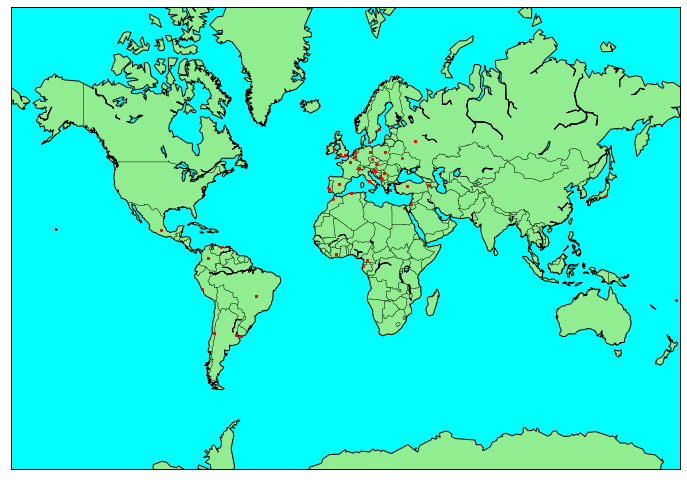

In [70]:
plt.figure(figsize = (12, 10))
m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)
x, y = None, None
x, y = m(players_coordinates.CapitalLongitude.tolist(),players_coordinates.CapitalLatitude.tolist())
m.plot(x,y,"o",color="red",markersize=2)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color = "lightgreen", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")
plt.show()

In [71]:
def plot_players_densities(coord_data, title = "Players densities"):
    plt.figure(figsize = (15, 10))
    m = Basemap(projection = "merc", llcrnrlat = -73, llcrnrlon = -180, urcrnrlat = 80, urcrnrlon = 180)

    # Prepare histogram bins
    num_bins = 100
    lon_bins = np.linspace(-180, 180, num_bins + 1)
    lat_bins = np.linspace(-90, 90, num_bins + 1)

    # Create 2D histogram values
    density, x_breaks, y_breaks = np.histogram2d(
        coord_data.CapitalLatitude,
        coord_data.CapitalLongitude, 
        [lat_bins, lon_bins])

    # Create the basis of the histogram - the (x, y) value pairs
    # and map them to 2D distances
    lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)
    x, y = m(lon_bins_2d, lat_bins_2d)

    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh(x, y, density)
    m.colorbar()
    plt.title(title)
    plt.show()

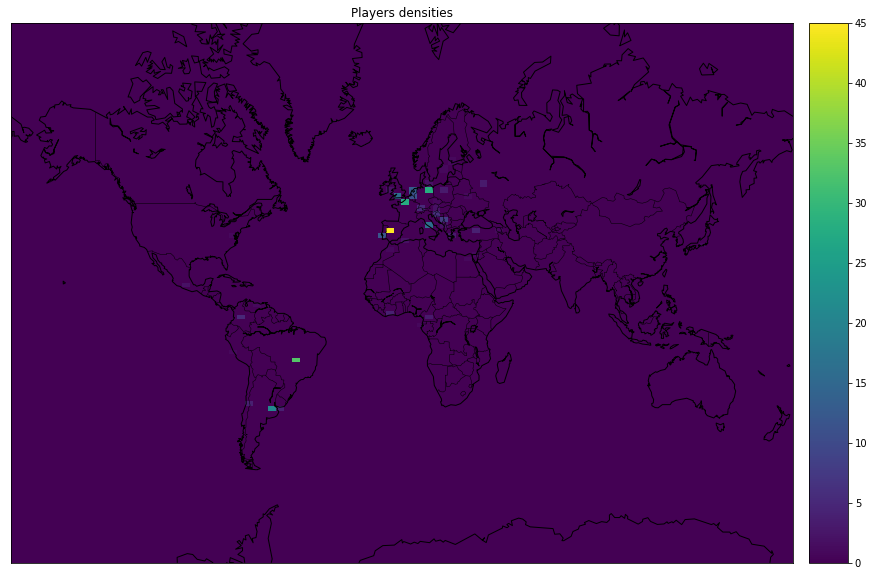

In [72]:
plot_players_densities(players_coordinates)

Most of the 300 highest paid professionals are from Spain.
We will investigate little bit by checking what si their number in the second group of 300 players.

In [73]:
second_300_val_players=players_16.groupby(["short_name","nationality"])["value_eur"].sum().sort_values(ascending=False)[301:600]

In [74]:
second_300_val_players=pd.DataFrame(second_300_val_players,index=None).reset_index()

In [75]:
second_300_val_players.groupby("nationality")["nationality"].count().sort_values(ascending=False).head(10)

nationality
Spain          43
France         25
Brazil         23
Italy          20
England        19
Germany        16
Argentina      14
Portugal       14
Netherlands    11
Turkey         10
Name: nationality, dtype: int64

Again we can see that spanish players are the biggest number in this group. Though the country with highest number of representatives in the database is England (about 47% more).

And now let's see the lower range players. Will take players from 8001-st to 8300-th in the descending list of player values.

In [76]:
lower_paid_players=players_16.groupby(["short_name","nationality"])["value_eur"].sum().sort_values(ascending=False)[8001:8300]
lower_paid_players=pd.DataFrame(lower_paid_players,index=None).reset_index()
lower_paid_players.groupby("nationality")["nationality"].count().sort_values(ascending=False).head(10)

nationality
England          23
France           21
Argentina        20
United States    18
Spain            15
Italy            15
Chile            15
Germany          12
Poland           11
Colombia         11
Name: nationality, dtype: int64

Here we can see that Spaniards are not largest in number. 

From these last few statistics it seems that, in general, Spanish players are better paid than others, though the average price per player is not highest. Still, number of players in the set is very high and this can be the reason for this result.

In [77]:
nationality_and_value=players_top_20_nations[["nationality","value_eur"]]
fig = px.box(nationality_and_value, x="nationality", y="value_eur",title="Value per Nation")

fig.show()

In [78]:
players_top_20_nations[players_top_20_nations["nationality"]=="Spain"]["value_eur"].median()

875000.0

In [79]:
players_top_20_nations[players_top_20_nations["nationality"]=="England"]["value_eur"].median()

300000.0

Seeing the median values for Brazil(1.8M), Portugal(1.2M), Spain(875000) and England(300000) and having in mind the number of players from Spain (987), England (1450), Brazil(420) and Portugal(324), we can only conclude that Spanish players are much better paid than English ones. Brazil and Portugal are less in numbers and each have 1 very expensive player which rizes the average value per nationality. 

Lets make a hypothesis:

$H0$ - there is not a substantial difference in the payment of English and Spanish players

$H1$ - there is a substantial difference in the payment of English and Spanish players

and we will use $\alpha_{c}$=1% since we have big dataset.

This we will test now and verify with the second dataset for 2020.

In [80]:
english_players_price=players_16[players_16["nationality"]=="England"]["value_eur"]
spanish_players_price=players_16[players_16["nationality"]=="Spain"]["value_eur"]

In [81]:
ttest_ind(english_players_price, spanish_players_price)

Ttest_indResult(statistic=-11.46332634242886, pvalue=1.1461395477178186e-29)

With such a low pvalue we can reject the Null Hypothesis. 

The final aim of this work is to create and train a model to predict the price of a player based on his capabilities. Before that we can see which features are most correlated to the value.

In [82]:
players_16.corr()

,age,height_cm,weight_kg,overall,potential,value_eur,international_reputation,weak_foot,skill_moves,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_speed,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
age,1.000000,0.080412,0.218434,0.439736,-0.125627,0.079883,0.277710,0.077216,-0.018800,-0.228214,-0.151552,-0.164913,0.048660,0.062909,-0.026930,0.100032,0.069155,0.086077,0.062796,0.005349,0.080368,0.086728,0.061369,-0.051007,0.070079,0.122131,0.139071,0.029144,-0.224824,-0.218302,-0.073392,0.395858,-0.123581,0.088910,0.121634,0.023215,0.259827,0.076456,0.237996,0.167387,0.014522,0.160532,0.071897,0.095487,0.085014,0.068744,0.110753,0.118913,0.114074,0.126850,0.109512,0.022931,0.022931,0.022931,-0.003591,0.009109,0.009109,0.009109,-0.003591,0.013235,0.013235,0.013235,0.001210,0.050825,0.050825,0.050825,0.001210,0.046002,0.084582,0.084582,0.084582,0.046002,0.049920,0.091531,0.091531,0.091531,0.049920
height_cm,0.080412,1.000000,0.766455,0.060498,0.017680,0.015859,0.045723,-0.164617,-0.413659,-0.043021,-0.094536,-0.478165,-0.378375,-0.425457,-0.481723,-0.094135,-0.137255,0.337328,-0.458348,-0.358111,-0.028599,-0.341943,-0.344828,-0.475107,-0.421572,-0.384103,-0.319234,-0.394236,-0.515279,-0.435221,-0.599136,0.003806,-0.787934,-0.281572,-0.073728,-0.259871,0.531675,-0.379441,-0.045248,-0.038329,-0.414091,-0.307677,-0.320547,-0.044097,-0.052524,-0.071170,0.345080,0.344673,0.340714,0.346370,0.343593,-0.371797,-0.371797,-0.371797,-0.455301,-0.426990,-0.426990,-0.426990,-0.455301,-0.438802,-0.438802,-0.438802,-0.445813,-0.391435,-0.391435,-0.391435,-0.445813,-0.325603,-0.258504,-0.258504,-0.258504,-0.325603,-0.285420,-0.152169,-0.152169,-0.152169,-0.285420
weight_kg,0.218434,0.766455,1.000000,0.134976,0.007411,0.042073,0.093912,-0.129611,-0.363400,-0.084685,-0.078132,-0.451028,-0.320896,-0.379390,-0.434535,-0.094449,-0.100458,0.323379,-0.405305,-0.312001,-0.033478,-0.302296,-0.291449,-0.431251,-0.368087,-0.326886,-0.279506,-0.353959,-0.484357,-0.413137,-0.546209,0.071590,-0.697291,-0.220455,-0.024147,-0.231913,0.595008,-0.316240,-0.002919,-0.035367,-0.360297,-0.253481,-0.265101,-0.051303,-0.063893,-0.081469,0.337671,0.339249,0.334518,0.340144,0.334678,-0.325837,-0.325837,-0.325837,-0.407746,-0.379890,-0.379890,-0.379890,-0.407746,-0.392627,-0.392627,-0.392627,-0.400793,-0.350573,-0.350573,-0.350573,-0.400793,-0.298411,-0.233983,-0.233983,-0.233983,-0.298411,-0.264230,-0.137809,-0.137809,-0.137809,-0.264230
overall,0.439736,0.060498,0.134976,1.000000,0.781817,0.598158,0.491618,0.205962,0.243675,-0.179027,-0.013182,0.144062,0.314795,0.356585,0.300196,0.250692,0.251938,-0.050719,0.337289,0.258967,0.285335,0.462311,0.313773,0.301068,0.354916,0.329594,0.449014,0.406070,0.157273,0.176556,0.211860,0.792814,0.037695,0.376679,0.237238,0.303921,0.292941,0.341751,0.391474,0.306587,0.286826,0.454645,0.288142,0.199397,0.224607,0.191321,-0.013305,-0.008285,-0.011916,-0.004463,-0.013170,0.321237,0.321237,0.321237,0.314071,0.324193,0.324193,0.324193,0.314071,0.328978,0.328978,0.328978,0.319067,0.355663,0.355663,0.355663,0.319067,0.314825,0.331386,0.331386,0.331386,0.314825,0.302586,0.287742,0.287742,0.287742,0.302586
potential,-0.125627,0.017680,0.007411,0.781817,1.000000,0.576793,0.380552,0.178361,0.255135,-0.022922,0.085902,0.213147

From the correlation we can see that maximum correlation the value has with international reputation and overall rating of the player. Which is logical.

### The Model

#### Linear Regression

Linear Regression model is used when we need to predict a continuous variable using a linear function of type $y=ax+b$.  $a$ and $b$ are unknown parameters. Given pairs $(x,y)$ we create a model under the assumption that $y$ depends linearly on $x$. [4]


Below is the representation of data and its linear regression model taken from Wikipedia.

![LinRegr](data/LinReg.jpg)


The red line is the approximation of the data and for one independednt variable $x$, the dependent variable $y$ will look like: $y=\theta_0+\theta_1*x_1$ (or $b+ax$). If we have more independent variables (called features) $x_1,x_2,...,x_n$ then $y=\theta_0+\theta_1*x_1+\theta_2*x_2+...+\theta_n*x_n$.

Here we will create a model with 78 features, which after converting categorical variables to numerical will become 114.

In [83]:
players_16.head().transpose()

sofifa_id,158023,20801,9014,167495,176580
short_name,L. Messi,Cristiano Ronaldo,A. Robben,M. Neuer,L. Suárez
age,28,30,31,29,28
dob,1987-06-24,1985-02-05,1984-01-23,1986-03-27,1987-01-24
height_cm,170,185,180,193,182
weight_kg,72,80,80,92,85
nationality,Argentina,Portugal,Netherlands,Germany,Uruguay
club,FC Barcelona,Real Madrid,FC Bayern München,FC Bayern München,FC Barcelona
overall,94,93,90,90,90
potential,95,93,90,90,90
value_eur,111000000,85500000,56000000,58000000,69000000


Before submitting the dataset to any ML algorithm, we need to do some more preprocessing.
Column "dob" (date of birth) can be removed since column "age" is there and they both give same information.
Names of players should be removed, as well as "players_traits", "joined", "body_type", "real_face" and "contract_valid_until". These are hardly supposed to influence the value of the player. "players_positions" can also be removed since the values in the columns with the respective positions depict players capabilities in each position. Naturally, they will have higher values for the positions the player takes.

In [84]:
players_16=players_16.drop(["short_name","dob","player_traits", "joined", "body_type", "real_face","contract_valid_until","nationality","player_positions","team_jersey_number","club"],axis=1)

In [85]:
players_16.head().transpose()

sofifa_id,158023,20801,9014,167495,176580
age,28,30,31,29,28
height_cm,170,185,180,193,182
weight_kg,72,80,80,92,85
overall,94,93,90,90,90
potential,95,93,90,90,90
value_eur,111000000,85500000,56000000,58000000,69000000
preferred_foot,Left,Right,Left,Right,Right
international_reputation,5,5,5,5,5
weak_foot,4,4,2,4,4
skill_moves,4,5,4,1,4


We will rearrange columns little bit by putting the target attribute at the beginning of the set so we can easily remove it later.

In [86]:
players_16.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving

In [87]:
players_16=players_16[['value_eur','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']]

In [88]:
players_16.head()

,value_eur,age,height_cm,weight_kg,overall,potential,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_speed,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,111000000,28,170,72,94,95,Left,5,4,4,Medium/Low,RW,92.0,88.0,86.0,95.0,24.0,62.0,0.0,76,92,71,87,85,96,89,90,82,96,94,90,90,90,95,80,63,75,58,88,48,22,88,90,74,1,25,22,6,11,15,14,8,90,90,90,94,94,94,94,94,94,94,94,93,85,85,85,93,65,60,60,60,65,60,47,47,47,60
20801,85500000,30,185,80,93,93,Right,5,4,5,High/Low,LM,92.0,93.0,80.0,91.0,33.0,78.0,0.0,81,95,86,80,87,93,88,75,72,90,91,92,87,94,61,94,94,85,79,93,61,34,95,81,85,22,31,23,7,11,15,14,11,94,94,94,93,94,94,94,93,91,91,91,91,83,83,83,91,67,63,63,63,67,63,55,55,55,63
9014,56000000,31,180,80,90,90,Left,5,2,4,High/Low,SUB,92.0,86.0,82.0,92.0,32.0,64.0,0.0,80,85,50,84,86,93,87,83,72,88,91,91,89,91,91,86,61,74,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15,87,87,87,92,91,91,91,92,91,91,91,90,83,83,83,90,68,63,63,63,68,62,50,50,50,62
167495,58000000,29,193,92,90,90,Right,5,4,1,Medium/Medium,GK,0.0,0.0,0.0,0.0,0.0,0.0,60.0,5,1,25,54,-3,7,3,-3,53,31,58,61,43,88,35,8,78,44,83,7,29,30,-1,90,37,-5,-5,-3,82,89,91,90,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176580,69000000,28,182,85,90,90,Right,5,4,4,High/Medium,ST,83.0,88.0,79.0,87.0,42.0,79.0,0.0,77,89,79,82,89,86,86,84,64,93,88,77,86,91,60,92,69,86,76,88,78,41,94,84,85,30,45,38,27,25,31,33,37,90,90,90,90,91,91,91,90,89,89,89,88,82,82,82,88,70,68,68,68,70,67,61,61,61,67


In [89]:
players_16.shape

(14881, 78)

We are going to apply Linear Regression in order to train a model to predict players' price. scikit-learn will be used. There are few steps before that.
1. Converting categorical values to numerical
2. Normalization
3. Splitting the data

#### Converting categorical values to numerical

ML algorithms cannot work with categorical features, that's why they have to be converted to numerical. One way is by  encoding (substituting) each value of a categorical feature by a binary number with n digits (actually n-1), where n is the number of unique values of the feature.

In [90]:
dummy_features_foot=pd.get_dummies(players_16["preferred_foot"])
dummy_features_foot.columns

Index(['Left', 'Right'], dtype='object')

In [91]:
dummy_features_position=pd.get_dummies(players_16["team_position"])
dummy_features_position.columns

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'],
      dtype='object')

In [92]:
dummy_features_rate=pd.get_dummies(players_16["work_rate"])
dummy_features_rate.columns

Index(['High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low',
       'Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium'],
      dtype='object')

In [93]:
players_16=players_16.drop(["preferred_foot","team_position","work_rate"],axis=1)

In [94]:
players_16[['Left', 'Right']]=dummy_features_foot
players_16[['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']]=dummy_features_position
players_16[['High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low',
       'Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium']]=dummy_features_rate

In [95]:
players_16.head()

,value_eur,age,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,gk_speed,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Left,Right,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RES,RF,RM,RS,RW,RWB,ST,SUB,High/High,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,111000000,28,170,72,94,95,5,4,4,92.0,88.0,86.0,95.0,24.0,62.0,0.0,76,92,71,87,85,96,89,90,82,96,94,90,90,90,95,80,63,75,58,88,48,22,88,90,74,1,25,22,6,11,15,14,8,90,90,90,94,94,94,94,94,94,94,94,93,85,85,85,93,65,60,60,60,65,60,47,47,47,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
20801,85500000,30,185,80,93,93,5,4,5,92.0,93.0,80.0,91.0,33.0,78.0,0.0,81,95,86,80,87,93,88,75,72,90,91,92,87,94,61,94,94,85,79,93,61,34,95,81,85,22,31,23,7,11,15,14,11,94,94,94,93,94,94,94,93,91,91,91,91,83,83,83,91,67,63,63,63,67,63,55,55,55,63,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9014,56000000,31,180,80,90,90,5,2,4,92.0,86.0,82.0,92.0,32.0,64.0,0.0,80,85,50,84,86,93,87,83,72,88,91,91,89,91,91,86,61,74,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15,87,87,87,92,91,91,91,92,91,91,91,90,83,83,83,90,68,63,63,63,68,62,50,50,50,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
167495,58000000,29,193,92,90,90,5,4,1,0.0,0.0,0.0,0.0,0.0,0.0,60.0,5,1,25,54,-3,7,3,-3,53,31,58,61,43,88,35,8,78,44,83,7,29,30,-1,90,37,-5,-5,-3,82,89,91,90,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
176580,69000000,28,182,85,90,90,5,4,4,83.0,88.0,79.0,87.0,42.0,79.0,0.0,77,89,79,82,89,86,86,84,64,93,88,77,86,91,60,92,69,86,76,88,78,41,94,84,85,30,45,38,27,25,31,33,37,90,90,90,90,91,91,91,90,89,89,89,88,82,82,82,88,70,68,68,68,70,67,61,61,61,67,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [96]:
modelling_data_features = players_16.drop("value_eur", axis = 1)
modelling_data_target = players_16["value_eur"]

In [97]:
modelling_data_features.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'international_reputation', 'weak_foot', 'skill_moves', 'pace',
       'shooting',
       ...
       'SUB', 'High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low',
       'Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium'],
      dtype='object', length=114)

#### Normalization

In order to have better accuracy of the model, the values of all features should have same scale.

In [98]:
scaler = MinMaxScaler()
modelling_data_features_scaled=scaler.fit_transform(modelling_data_features)

#### Splitting the data

In [99]:
features_train, features_test, target_train, target_test = train_test_split(
    modelling_data_features_scaled, modelling_data_target, train_size = 0.7, test_size = 0.3, random_state = 42)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape, sep = "\r\n")

(10416, 114)
(4465, 114)
(10416,)
(4465,)


#### Run the Model

In [100]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
score=model.score(features_test,target_test)
score

0.6270241132724823

### Check the model with dataset from a different year (2020)

In [102]:
players_20=pd.read_csv("/content/drive/My Drive/DS/data/players_20.csv",index_col="sofifa_id")

In [103]:
players_20.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

The new dataset has same format as the old one, so we will do the same steps for data cleaning.

In [104]:
players_20_for_modelling=players_20.drop(["player_url","long_name","wage_eur","release_clause_eur","mentality_composure", "nation_position", "nation_jersey_number", "loaned_from","player_tags"],axis=1)

In [105]:
players_20_for_modelling=players_20_for_modelling.drop(["gk_diving","gk_handling", "gk_kicking","gk_reflexes","gk_positioning"],axis=1)

In [106]:
cols_for_fill_20=['pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [107]:
transform_columns_to_number(players_20_for_modelling,cols_for_fill_20)

In [108]:
players_20_for_modelling.isnull().sum().sort_values(ascending=False)

player_traits                 10712
joined                         1288
contract_valid_until            240
team_jersey_number              240
team_position                   240
attacking_finishing               0
dribbling                         0
defending                         0
physic                            0
gk_speed                          0
attacking_crossing                0
attacking_heading_accuracy        0
shooting                          0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
passing                           0
rb                                0
pace                              0
movement_reactions                0
age                               0
dob                         

In [109]:
columns_20=["joined","team_position","contract_valid_until"]
fill_missing_data(players_20_for_modelling,columns)

### Test the model and check the hypothesis with new data

In [110]:
players_20_for_modelling["team_jersey_number"]=players_20_for_modelling["team_jersey_number"].fillna(0)

In [111]:
players_20_for_modelling.isnull().sum().sort_values(ascending=False)

player_traits                 10712
rb                                0
movement_reactions                0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
gk_speed                          0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
pace                              0
contract_valid_until              0
joined                            0
value_eur                         0
age                               0
dob                               0
height_cm                   

In [112]:
players_20_for_modelling=players_20_for_modelling.drop(["short_name","dob","player_traits", "joined", "body_type", "real_face","contract_valid_until","player_positions","nationality","team_jersey_number","club"],axis=1)

In [113]:
players_20_for_modelling=players_20_for_modelling[['value_eur','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'team_position', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_speed',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']]

In [114]:
dummy_features_foot_20=pd.get_dummies(players_20_for_modelling["preferred_foot"])
dummy_features_position_20=pd.get_dummies(players_20_for_modelling["team_position"])
dummy_features_rate_20=pd.get_dummies(players_20_for_modelling["work_rate"])

In [115]:
players_20_for_modelling=players_20_for_modelling.drop(["preferred_foot","team_position","work_rate"],axis=1)

In [116]:
players_20_for_modelling[['Left', 'Right']]=dummy_features_foot_20
players_20_for_modelling[['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']]=dummy_features_position_20
players_20_for_modelling[['High/High', 'High/Low', 'High/Medium', 'Low/High', 'Low/Low',
       'Low/Medium', 'Medium/High', 'Medium/Low', 'Medium/Medium']]=dummy_features_rate_20

In [117]:
modelling_data_20=pd.get_dummies(players_20_for_modelling)

In [118]:
modelling_data_features_20 = modelling_data_20.drop("value_eur", axis = 1)
modelling_data_target_20 = modelling_data_20["value_eur"]

In [119]:
scaler = MinMaxScaler()
modelling_data_features_scaled_20=scaler.fit_transform(modelling_data_features_20)

In [120]:
score=model.score(modelling_data_features_scaled_20,modelling_data_target_20 )
score

0.5373875693904084

This is very low accuracy. Either data is not properly preprocessed, or the available data has not much relation to the price of players. Main features that influence value might not be present in the data. 

### Checking the Hypothesis

In [121]:
english_players_price_20=players_20[players_20["nationality"]=="England"]["value_eur"]
spanish_players_price_20=players_20[players_20["nationality"]=="Spain"]["value_eur"]

In [122]:
ttest_ind(english_players_price_20, spanish_players_price_20)

Ttest_indResult(statistic=-12.978089447519524, pvalue=2.0915163608115403e-37)

Here the pvalue is even smaller than for 2016, which again leads to rejecting the H0 hypothesis. All this means that Spanish and English players do not have equal payment.

### Future work

Many more analysis can be done with this dataset. Players_traits can be investigated. Do they have any influence on the value? Individual players progress through the years can be also checked (the complete set contains data for all years 2015 - 2020).

### References

    [1] Wikipedia
    [2] https://www.guidetofootball.com/tactics/playing-positions/
    [3] Yordan Darakchiev. SoftUni "Data Science" course, Working-with-Spatial-Data-and-Network-Analysis, 2020.
    [4] Yordan Darakchiev. SoftUni "Data Science" course, Regression Models, 2020.
    [5] Jake VanderPlas. Python Data Science Handbook. O'Reilly, 2017.